In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from os import path
import numpy as np
from tokenization import *
import nltk
import time
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer


fulltext, fullgenre = tag_subtitles(path.relpath('ProcessedSubtitles'))
fulltext, fullgenre = shuffle(fulltext, fullgenre)

7880


In [2]:
# demo = False
# text = fulltext if not demo else fulltext[:1000]
# genre = fullgenre if not demo else fullgenre[:1000]

text = fulltext
genre = fullgenre

test_size = int(len(text) * 0.2)

# print(collections.Counter(genre))
# print(genre)

ngram=(1, 1)
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=ngram, stop_words='english') # (7887, 44339)

#vectorizer = CountVectorizer(binary=False,ngram_range=ngram, min_df=5, stop_words='english')
bow_tf = vectorizer.fit_transform(text)
bow_tf.shape

# bow_tf, vectorizer = bag_of_words_and_tf(text)
# bow_tf.shape # (7887, 311434)


(7887, 44339)

In [56]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

genre_names = ["Action", "Comedy", "Crime", "Horror", "Musical", "Romance", "War", "Western"]
top10 = {}
for genre_top10 in genre_names:
    comedy_ind = [True if x == genre_top10 else False for i, x in enumerate(genre) ]
    comedy_movies = bow_tf[comedy_ind]
    comedy_movies
    vocab = vectorizer.vocabulary_
    reverse_vocab = {v:k for k,v in vocab.items()}
    feature_names = vectorizer.get_feature_names()
    df_tfidf = pd.DataFrame(comedy_movies.toarray(), columns = feature_names)
    idx = comedy_movies.toarray().argsort(axis=1)
    tfidf_max10 = idx[:,-10:]
    top10[genre_top10] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max10 ]

Common top words between genres Action and Comedy is: 2529
Common top words between genres Action and Crime is: 3041
Common top words between genres Action and Horror is: 2126
Common top words between genres Action and Musical is: 1795
Common top words between genres Action and Romance is: 2339
Common top words between genres Action and War is: 2110
Common top words between genres Action and Western is: 1799
Common top words between genres Comedy and Action is: 2529
Common top words between genres Comedy and Crime is: 2616
Common top words between genres Comedy and Horror is: 2081
Common top words between genres Comedy and Musical is: 2112
Common top words between genres Comedy and Romance is: 3024
Common top words between genres Comedy and War is: 1842
Common top words between genres Comedy and Western is: 1776
Common top words between genres Crime and Action is: 3041
Common top words between genres Crime and Comedy is: 2616
Common top words between genres Crime and Horror is: 2068
Co

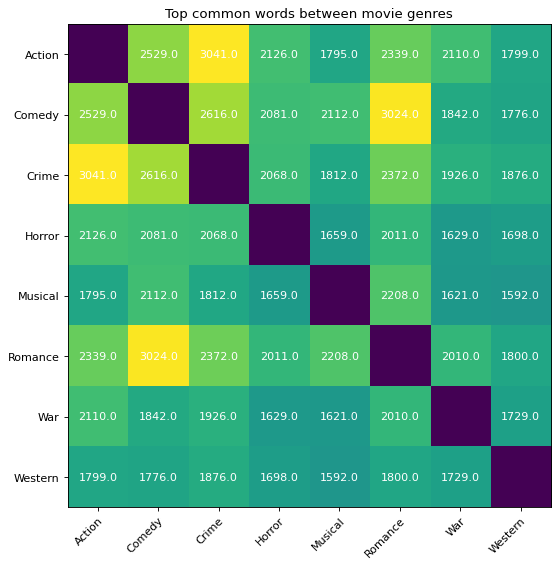

In [73]:
from matplotlib.pyplot import figure

wordsets = {}
for cat in genre_names:
    wordsets[cat] = set(np.array(top10[cat]).flatten()) 

def compare_genres(g1, g2):
    ix = wordsets[g1].intersection(wordsets[g2])
    print("Common top words between genres %s and %s is: %d" % (g1, g2, len(ix)))
    return len(ix)

    
    
# figure(figsize=(20, 12), dpi=80)
size = len(genre_names)
matr = np.zeros(size * size).reshape(size, size)
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

for x in range(len(genre_names)):
    for y in range(len(genre_names)):
        if y != x:
            matr[x,y] = compare_genres(genre_names[x], genre_names[y])
            text = ax.text(x, y, matr[x, y],
                       ha="center", va="center", color="w")
            



# We want to show all ticks...
ax.set_xticks(np.arange(size))
ax.set_yticks(np.arange(size))
# ... and label them with the respective list entries
ax.set_xticklabels(genre_names)
ax.set_yticklabels(genre_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

im = ax.imshow(matr)

ax.set_title("Top common words between movie genres")
# fig.tight_layout()
plt.show()



In [77]:
# wordsets["Comedy"].intersection(wordsets["Romance"])
#wordsets["Crime"].intersection(wordsets["Action"])
wordsets["Western"].intersection(wordsets["War"])

{'roy',
 'dover',
 'stanley',
 'leon',
 'fowler',
 'thomson',
 '1915',
 'sebastian',
 'archiv',
 'shorti',
 'eugen',
 'chamberlain',
 'dixi',
 'stepan',
 'melvil',
 'alright',
 'jayhawk',
 'ann',
 'giusepp',
 'spangler',
 'mcnamara',
 'sta',
 'brandt',
 'stuart',
 'nino',
 'cora',
 'schultz',
 'ralph',
 'bub',
 'hoecak',
 'muito',
 'bishop',
 'curti',
 'hay',
 'willi',
 'carefre',
 'brian',
 'flute',
 'vidal',
 'wu',
 'everett',
 'blyth',
 'clifton',
 'mcclure',
 'gardner',
 'neighbour',
 'rico',
 'butch',
 'josh',
 'lomax',
 'mclaughlin',
 'benjamin',
 'florenc',
 'hlne',
 'newt',
 'ik',
 'oli',
 'kearney',
 'pope',
 'abner',
 'burrow',
 'champ',
 'valdez',
 'aldo',
 'ross',
 'poppi',
 'lee',
 'drago',
 'mckay',
 'benedict',
 'oracl',
 'rocket',
 'ta',
 'shear',
 'waldo',
 'lz',
 'mussel',
 'shipley',
 'olli',
 'bonnet',
 'mexico',
 'nicol',
 'claiborn',
 'watson',
 'christi',
 'tyre',
 'adriana',
 'mohawk',
 'libbi',
 'rajput',
 'wyom',
 'unhand',
 'sharkey',
 'treelin',
 'trestl',
 

In [20]:
import collections
import pprint
pprint.pprint(collections.Counter(fullgenre))

Counter({'War': 986,
         'Action': 986,
         'Comedy': 986,
         'Crime': 986,
         'Horror': 986,
         'Musical': 986,
         'Romance': 986,
         'Western': 985})


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

def learn(clf, use_svd=False):
    #     text, genre = randomize(text, genre)
        print(clf)
        start = time.time()

#         dataset = svd_bow_tf if use_svd is True else bow_tf
        dataset = bow_tf_dense_pca if use_svd is True else bow_tf

        clf.fit(dataset[test_size:], genre[test_size:])
        test_data = dataset[:test_size]

        test_genre = genre[:test_size]

        predicted = clf.predict(test_data)
        acc = accuracy_score(test_genre, predicted)*100

#         acc_scores.append(float(acc))
        elapsed = time.time() - start
        print('time elapsed %d' % elapsed)

        print(classification_report(test_genre, predicted))
        plot_confusion_matrix(clf, test_data, test_genre)
        plt.show()
        # acc_scores.append(float(acc/sample_num))
        return acc
    

In [4]:
def classification(clfs, use_svd=False):
    acc_scores = []

    for clf in clfs:
        acc = learn(clf, use_svd)
        acc_scores.append(acc)

    print(acc_scores)

#     plt.plot(alpha_values, acc_scores)#, 'o')
#     plt.axis([0, 5, -1, 100])

#     plt.xlabel('Alpha values')
#     plt.ylabel('Accuracy')
#     plt.legend(loc='upper right', numpoints=1)
#     plt.title("Accuracies / Alpha values")

    #for k, accuracy in zip(k_values, accuracies):
    #    plt.text(k - 0.6, accuracy+1, str(k) + ", " + str(format(accuracy, '.1f')), fontsize=10)

#     plt.show()

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
svd_bow_tf = svd.fit_transform(bow_tf) 
svd_bow_tf.shape

(7887, 100)

In [5]:
from sklearn.decomposition import PCA
bow_tf_dense = bow_tf.todense()
bow_tf_dense_pca = PCA(n_components=100, random_state=42).fit_transform(bow_tf_dense)
bow_tf_dense_pca.shape

(7887, 100)

LogisticRegression(max_iter=1000)
time elapsed 1
              precision    recall  f1-score   support

      Action       0.55      0.51      0.53       190
      Comedy       0.44      0.44      0.44       171
       Crime       0.56      0.57      0.56       201
      Horror       0.74      0.77      0.75       197
     Musical       0.75      0.85      0.80       212
     Romance       0.49      0.40      0.44       177
         War       0.79      0.88      0.83       200
     Western       0.90      0.84      0.87       229

    accuracy                           0.67      1577
   macro avg       0.65      0.66      0.65      1577
weighted avg       0.67      0.67      0.67      1577



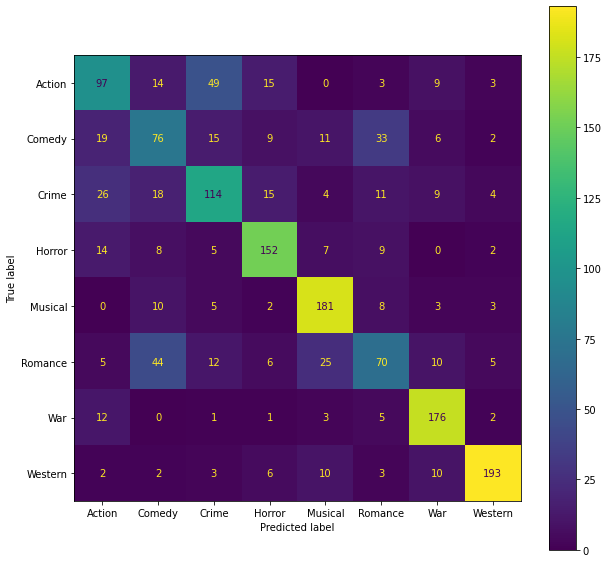

[67.15282181357007]


In [6]:
alpha_values = [.1, .5, 1, 2, 3, 4, 5]
# classification([LogisticRegression(C=a, max_iter=1000) for a in alpha_values]) 
classification([LogisticRegression(max_iter=1000)], use_svd=True) 


In [7]:
alpha_values = [.1, .5, 1, 2, 3, 4, 5]
from sklearn.naive_bayes import MultinomialNB
# classification([MultinomialNB(alpha=a) for a in alpha_values]) # naive bayes
classification([MultinomialNB()], True) # naive bayes


MultinomialNB()


ValueError: Negative values in data passed to MultinomialNB (input X)

KNeighborsClassifier()
time elapsed 0
              precision    recall  f1-score   support

      Action       0.47      0.50      0.49       190
      Comedy       0.33      0.40      0.36       171
       Crime       0.51      0.50      0.51       201
      Horror       0.72      0.68      0.70       197
     Musical       0.70      0.80      0.75       212
     Romance       0.34      0.28      0.30       177
         War       0.86      0.79      0.82       200
     Western       0.89      0.84      0.86       229

    accuracy                           0.61      1577
   macro avg       0.60      0.60      0.60      1577
weighted avg       0.62      0.61      0.61      1577



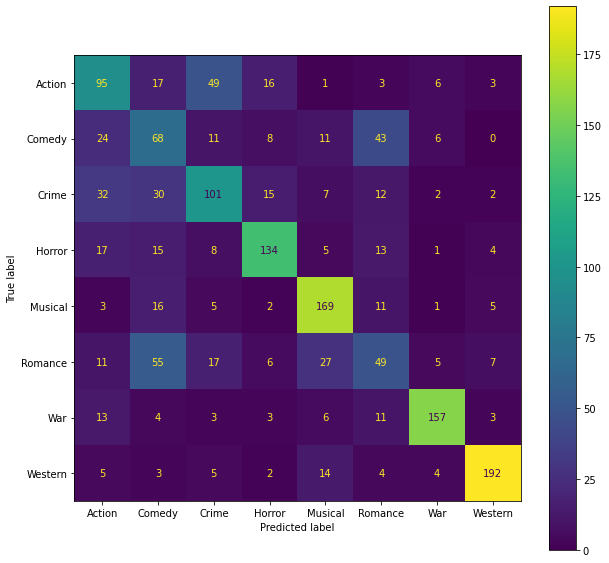

[61.192136968928345]


In [7]:
# classification([neighbors.KNeighborsClassifier( a * 10, 'distance') for a in alpha_values]) 
classification([neighbors.KNeighborsClassifier()], True) 


LinearSVC()
time elapsed 1
              precision    recall  f1-score   support

      Action       0.58      0.51      0.54       190
      Comedy       0.45      0.44      0.45       171
       Crime       0.56      0.59      0.58       201
      Horror       0.75      0.81      0.78       197
     Musical       0.75      0.86      0.80       212
     Romance       0.51      0.36      0.42       177
         War       0.80      0.90      0.84       200
     Western       0.90      0.89      0.89       229

    accuracy                           0.68      1577
   macro avg       0.66      0.67      0.66      1577
weighted avg       0.67      0.68      0.68      1577



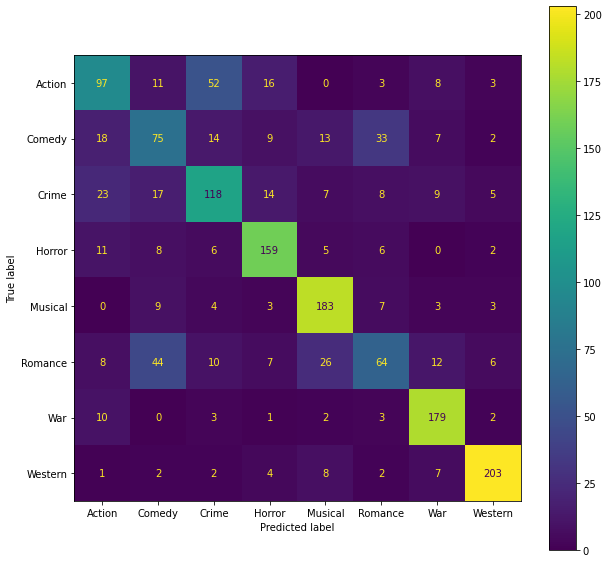

[68.3576410906785]


In [8]:
classification([svm.LinearSVC(max_iter=1000)], True)